In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ams=pd.read_json(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\machine learning\Datasets-1\Datasets\amsterdam.json")

In [3]:
ams.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


In [4]:
ams.shape

(15181, 13)

In [5]:
ams.isna().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [6]:
ams.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,52.426224,5.027689


In [7]:
ams['price'].head()

0    $145.00
1     $88.00
2    $130.00
3    $110.00
4    $115.00
Name: price, dtype: object

In [11]:
ams['price']=ams['price'].str.replace('$','')
ams['price']=ams['price'].str.replace(',','')

C:\Users\PRANAY\AppData\Local\Temp/ipykernel_9240/4225648539.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ams['price']=ams['price'].str.replace('$','')


In [12]:
ams['price']=ams['price'].astype(float)

In [13]:
ams.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                             float64
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [14]:
ams.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,134.799223,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,85.751273,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,90.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,118.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,3142.000000,52.426224,5.027689


In [15]:
ams['price'].mean()

134.79922271260128

In [16]:
ams['price'].max()

3142.0

In [17]:
ams['price']
print("50th percentile of ams['price'] : ",
       np.percentile(ams['price'], 50))
print("25th percentile of ams['price'] : ",
       np.percentile(ams['price'], 25))
print("99th percentile of ams['price'] : ",
       np.percentile(ams['price'], 99))

50th percentile of ams['price'] :  118.0
25th percentile of ams['price'] :  90.0
99th percentile of ams['price'] :  440.0


In [18]:
ams['price']
print("90th percentile of ams['price'] :",np.percentile(ams['price'],90))

90th percentile of ams['price'] : 220.0


In [19]:
ams=ams[(ams.price<=440.0)]
ams=ams.dropna()

In [20]:
ams.isna().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
dtype: int64

In [21]:
ams.shape

(14998, 13)

In [22]:
a_latitude=52.379189
a_longitude=4.899431

In [23]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


for index, row in ams.iterrows():
    ams.loc[index, 'distance'] = haversine(a_longitude, a_latitude, row['longitude'], row['latitude'])

In [24]:
ams.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,distance
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,2.885443
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,Entire home/apt,f,2.919191
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,Entire home/apt,f,3.168346
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,Entire home/apt,f,2.876726


In [25]:
dt3=ams[ams.room_type=='Private room']
dt3=dt3[dt3.distance<=1]
dt3.price.describe()

count    298.000000
mean     118.097315
std       48.073043
min       38.000000
25%       88.000000
50%      105.000000
75%      139.000000
max      345.000000
Name: price, dtype: float64

In [26]:
ams.sort_values(['distance'],ascending=True)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,distance
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,0.206638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,1.0,3,1.0,1.0,2,2,37,1,40.0,52.290687,4.983784,Private room,f,11.381113
6779,1.0,4,1.0,3.0,1,3,1,1,101.0,52.292209,4.989963,Entire home/apt,f,11.454847
6791,1.0,2,1.0,1.0,1,1,22,1,50.0,52.292890,4.995102,Private room,t,11.583068
6766,1.0,2,1.0,1.0,1,2,5,1,50.0,52.291664,4.992333,Private room,f,11.592780


In [27]:
ams=pd.get_dummies(ams)

In [28]:
ams.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,distance,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,2.885443,1,0,0,1,0
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,2.919191,1,0,0,1,0
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,3.168346,1,0,0,1,0
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,2.876726,1,0,0,1,0


In [29]:
x=ams.drop(['price'],axis=1)
y=ams['price']

In [30]:
x.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,distance,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,52.370237,4.859507,2.885443,1,0,0,1,0
2,1.0,2,1.0,1.0,2,2,4,1,52.362016,4.866872,2.919191,1,0,0,1,0
3,2.0,4,1.0,2.0,2,4,2,2,52.365826,4.858178,3.168346,1,0,0,1,0
4,1.0,2,1.0,1.0,1,3,10,1,52.364179,4.864885,2.876726,1,0,0,1,0


In [31]:
x.shape

(14998, 16)

In [32]:
y.head()

0    145.0
1     88.0
2    130.0
3    110.0
4    115.0
Name: price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

In [35]:
x_train.shape

(10498, 16)

In [36]:
x_test.shape

(4500, 16)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
for i in range(30,610,10):
    reg=RandomForestRegressor(n_estimators=i,max_depth=5,max_features='sqrt',oob_score=True,random_state=200)
    reg.fit(x_train,y_train)
    oob=reg.oob_score_
    print('For n_estimators = '+str(i))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 30
OOB score is 0.4865044713159379
************************
For n_estimators = 40
OOB score is 0.4877080324519447
************************
For n_estimators = 50
OOB score is 0.4876495913188822
************************
For n_estimators = 60
OOB score is 0.4885340209152782
************************
For n_estimators = 70
OOB score is 0.4886361951738354
************************
For n_estimators = 80
OOB score is 0.4897374631564211
************************
For n_estimators = 90
OOB score is 0.48979991882977525
************************
For n_estimators = 100
OOB score is 0.48964552503183356
************************
For n_estimators = 110
OOB score is 0.489839071312162
************************
For n_estimators = 120
OOB score is 0.4901398460296442
************************
For n_estimators = 130
OOB score is 0.4913226406753376
************************
For n_estimators = 140
OOB score is 0.49089158535610977
************************
For n_estimators = 150
OOB score is 0.4908548

In [39]:
from sklearn import metrics
metrics.mean_squared_error(y_test,reg.predict(x_test))

2185.047746626844

In [40]:
reg=RandomForestRegressor(n_estimators=330,max_depth=5,max_features='sqrt',oob_score=True)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=330,
                      oob_score=True)

In [42]:
reg.score(x_test,y_test)

0.46763927744506906

In [43]:
reg.oob_score_

0.4938117270517288

In [44]:
reg.feature_importances_

array([7.54990405e-03, 3.19300441e-01, 6.93772378e-02, 2.34052670e-01,
       8.48180398e-02, 4.15023596e-03, 4.11603370e-03, 1.36786588e-02,
       1.77521607e-02, 3.07761935e-02, 5.98982429e-02, 8.63461475e-02,
       6.71421285e-02, 1.74698001e-04, 4.36283168e-04, 4.30923788e-04])

In [45]:
imp_feat=pd.Series(reg.feature_importances_,index=x.columns.tolist())

In [46]:
imp_feat.sort_values(ascending=False)

accommodates                      0.319300
bedrooms                          0.234053
room_type_Entire home/apt         0.086346
guests_included                   0.084818
bathrooms                         0.069377
room_type_Private room            0.067142
distance                          0.059898
longitude                         0.030776
latitude                          0.017752
calculated_host_listings_count    0.013679
host_listings_count               0.007550
minimum_nights                    0.004150
number_of_reviews                 0.004116
instant_bookable_f                0.000436
instant_bookable_t                0.000431
room_type_Shared room             0.000175
dtype: float64

In [47]:
pred=reg.predict(x_test)
pred

array([133.98501947, 186.40106272, 113.43498238, ...,  71.99289694,
       119.94474371, 155.95099541])

In [48]:
y=pd.DataFrame(ams['price'])

In [49]:
Errors=y_test-pred

In [50]:
Errors.head()

11457    16.014981
6421     63.598937
9464     11.565018
5624    -41.766272
7937    -31.001935
Name: price, dtype: float64

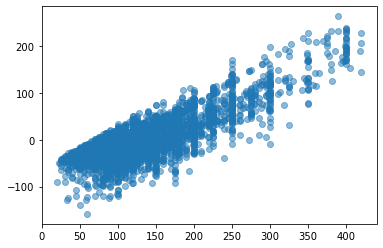

In [51]:
plt.scatter(y_test,Errors,alpha=0.5)